# Content_Monetization_Modeler

### Importing the basic required library


In [1]:
#basic libiraries
import json
import os

#data preprocessing
import pandas as pd
import numpy as np

#Data_visualization(EDA)

import matplotlib.pyplot as plt
import seaborn as sns

#library for saving the model
import pickle
import joblib


Importing data transformation library

In [2]:
#Encoding
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,TargetEncoder,LabelEncoder
#Standardization,Normalization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#To identify missing values
from sklearn.impute import SimpleImputer

Importing library for splitting the data into train and test sets


In [3]:
#For splitting train and test sample for model
from sklearn.model_selection import train_test_split

Importing regularization library

In [4]:
#For handling overfitting
from sklearn.linear_model import Ridge,Lasso,ElasticNet

Importing model selection library

In [5]:
#Regression models

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Importing evaluation metrics library


In [6]:
#regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Auto hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# K-fold Cross Validation
from sklearn.model_selection import cross_val_score

# Data Exploration
●	Understand the Dataset

In [7]:
#load data
Base_path='/content/youtube_ad_revenue_dataset.csv'
youtube_data=pd.read_csv(Base_path)


Dataset overview

In [8]:
#checking data first five rows
youtube_data.head()

video_id                        date  views   likes  comments  \
0  vid_3092  2024-09-24 10:50:40.993199   9936  1221.0     320.0   
1  vid_3459  2024-09-22 10:50:40.993199  10017   642.0     346.0   
2  vid_4784  2024-11-21 10:50:40.993199  10097  1979.0     187.0   
3  vid_4078  2025-01-28 10:50:40.993199  10034  1191.0     242.0   
4  vid_3522  2025-04-28 10:50:40.993199   9889  1858.0     477.0   

   watch_time_minutes  video_length_minutes  subscribers       category  \
0        26497.214184              2.862137       228086  Entertainment   
1        15209.747445             23.738069       736015         Gaming   
2        57332.658498             26.200634       240534      Education   
3        31334.517771             11.770340       434482  Entertainment   
4        15665.666434              6.635854        42030      Education   

   device country  ad_revenue_usd  
0      TV      IN      203.178237  
1  Tablet      CA      140.880508  
2      TV      CA      360.134008  
3  Mobile      UK      224.638261  
4  Mobile      CA      165.514388

In [9]:
#checking last five rows
youtube_data.tail()

video_id                        date  views   likes  comments  \
122395  vid_2902  2024-12-14 10:50:40.993199   9853  1673.0     147.0   
122396  vid_3890  2024-07-13 10:50:40.993199  10128  1709.0      63.0   
122397  vid_3934  2024-06-10 10:50:40.993199  10267   700.0       NaN   
122398  vid_4260  2024-12-22 10:50:40.993199  10240  1616.0     106.0   
122399  vid_1056  2024-06-25 10:50:40.993199   9931   770.0       NaN   

        watch_time_minutes  video_length_minutes  subscribers   category  \
122395        42075.704885             25.490195       210818  Education   
122396        57563.703040             16.229133       878860      Music   
122397        27549.714659             23.822365       576756       Tech   
122398        56967.384382              7.753099       585138      Music   
122399        38466.837135             27.305703       517587       Tech   

         device country  ad_revenue_usd  
122395   Tablet      US      280.986396  
122396  Desktop      UK      354.612981  
122397   Tablet      CA      203.643106  
122398   Mobile      UK      351.525811  
122399       TV      CA      253.842824

●	Preprocessing:

In [10]:
#drop duplicates

youtube_data=youtube_data.drop_duplicates()

In [11]:
#checking datashape
youtube_data.shape
print(f"the dataset has {youtube_data.shape[0]} rows and {youtube_data.shape[1]} columns")

the dataset has 120000 rows and 12 columns


In [12]:
#checking datainfo

youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              120000 non-null  object 
 1   date                  120000 non-null  object 
 2   views                 120000 non-null  int64  
 3   likes                 114000 non-null  float64
 4   comments              114000 non-null  float64
 5   watch_time_minutes    114000 non-null  float64
 6   video_length_minutes  120000 non-null  float64
 7   subscribers           120000 non-null  int64  
 8   category              120000 non-null  object 
 9   device                120000 non-null  object 
 10  country               120000 non-null  object 
 11  ad_revenue_usd        120000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.9+ MB


In [13]:
#describe the numberical column

print(f"Numerical statistical value:\n {youtube_data.describe()}")

Numerical statistical value:
                views          likes       comments  watch_time_minutes  \
count  120000.000000  114000.000000  114000.000000       114000.000000   
mean     9999.832333    1099.585044     274.349842        37540.749921   
std        99.918405     519.526733     129.746796        12987.818758   
min      9521.000000     195.000000      48.000000        14659.105562   
25%      9933.000000     650.000000     162.000000        26364.159667   
50%     10000.000000    1102.000000     274.000000        37522.221205   
75%     10067.000000    1547.250000     387.000000        48782.739997   
max     10468.000000    2061.000000     515.000000        61557.670089   

       video_length_minutes    subscribers  ad_revenue_usd  
count         120000.000000  120000.000000   120000.000000  
mean              16.017910  502291.970050      252.711361  
std                8.084928  288364.967705       61.954125  
min                2.000142    1005.000000      126.590603 

In [14]:
#checking categorical columns

print(f"Categorical stat summary: \n {youtube_data.describe(include='object')} ")

Categorical stat summary: 
         video_id                        date   category  device country
count     120000                      120000     120000  120000  120000
unique      5000                         365          6       4       6
top     vid_3033  2025-04-03 10:50:40.993199  Education      TV      CA
freq          46                         378      20123   30086   20198 


In [15]:
#checking null values

Null_values_before=youtube_data.isnull().sum()
print( Null_values_before)
print(f"No. of null values: {youtube_data.isnull().sum().sum()}")

video_id                   0
date                       0
views                      0
likes                   6000
comments                6000
watch_time_minutes      6000
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64
No. of null values: 18000


In [16]:
#check no. of duplicate

youtube_data.duplicated().sum()

print(f"No. of duplicate: {youtube_data.duplicated().sum()}")

No. of duplicate: 0


In [17]:
#checking unique values per column

print(f"Unique values per column: \n {youtube_data.nunique()}")

Unique values per column: 
 video_id                  5000
date                       365
views                      736
likes                     1855
comments                   466
watch_time_minutes      114000
video_length_minutes    120000
subscribers             113254
category                     6
device                       4
country                      6
ad_revenue_usd          120000
dtype: int64


In [18]:
#column names
Columns=youtube_data.columns

print(f"Columns: \n {Columns}")

Columns: 
 Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')


In [19]:
#checking value count in each column

for col in youtube_data:
  print (f"\n Value counts for column: {col} ")
  print(youtube_data[col].value_counts())


 Value counts for column: video_id 
video_id
vid_3033    46
vid_1725    42
vid_4483    42
vid_988     41
vid_2429    40
            ..
vid_3847    11
vid_3001    11
vid_4852    11
vid_1629    10
vid_4163    10
Name: count, Length: 5000, dtype: int64

 Value counts for column: date 
date
2025-04-03 10:50:40.993199    378
2024-08-11 10:50:40.993199    373
2025-01-28 10:50:40.993199    373
2025-02-10 10:50:40.993199    368
2025-05-07 10:50:40.993199    367
                             ... 
2025-06-01 10:50:40.993199    290
2025-01-19 10:50:40.993199    290
2025-01-25 10:50:40.993199    285
2025-04-16 10:50:40.993199    283
2024-06-29 10:50:40.993199    279
Name: count, Length: 365, dtype: int64

 Value counts for column: views 
views
9999     520
10023    516
10019    516
9982     512
9993     503
        ... 
9537       1
10337      1
9610       1
9691       1
10335      1
Name: count, Length: 736, dtype: int64

 Value counts for column: likes 
likes
1507.0    87
1036.0    87
776.0     

In [20]:
#checking datatype
print(f"Data types: \n {youtube_data.dtypes}")

Data types: 
 video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object


## Exploratory data analysis (EDA)

### Data Visualization

Univariate analysis



--- views ---
count    120000.000000
mean       9999.832333
std          99.918405
min        9521.000000
25%        9933.000000
50%       10000.000000
75%       10067.000000
max       10468.000000
Name: views, dtype: float64




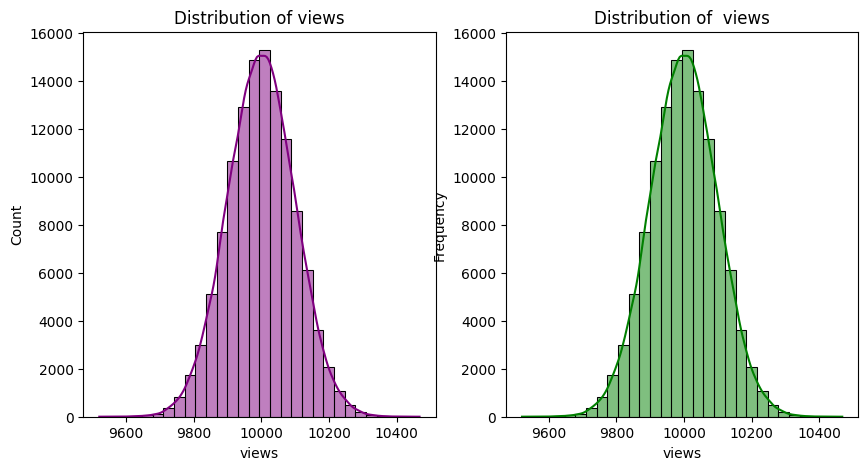



 * views is symmetric or zero skew (perfectly symmetrical)
 * views distribution is platykurtic (flatter)

--- likes ---
count    114000.000000
mean       1099.585044
std         519.526733
min         195.000000
25%         650.000000
50%        1102.000000
75%        1547.250000
max        2061.000000
Name: likes, dtype: float64




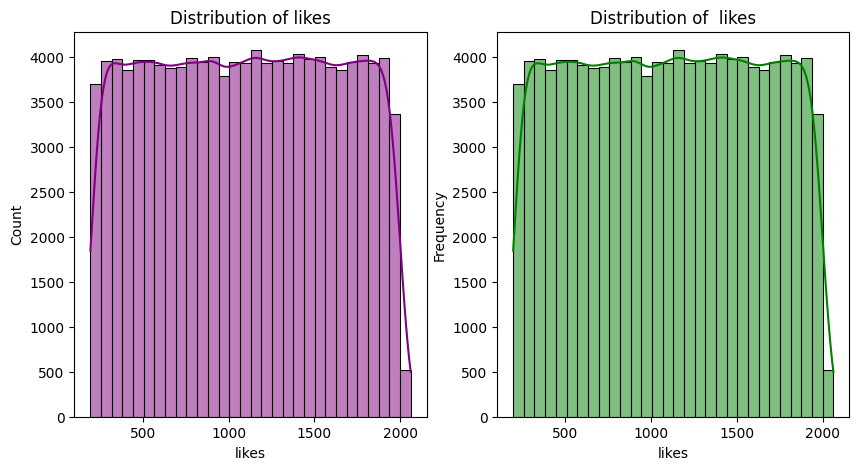



 * likes is symmetric or zero skew (perfectly symmetrical)
 * likes distribution is platykurtic (flatter)

--- comments ---
count    114000.000000
mean        274.349842
std         129.746796
min          48.000000
25%         162.000000
50%         274.000000
75%         387.000000
max         515.000000
Name: comments, dtype: float64




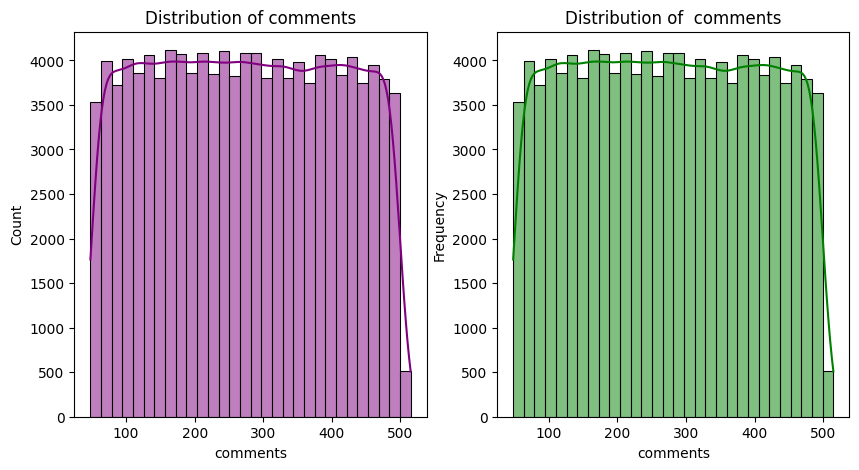



 * comments is symmetric or zero skew (perfectly symmetrical)
 * comments distribution is platykurtic (flatter)

--- watch_time_minutes ---
count    114000.000000
mean      37540.749921
std       12987.818758
min       14659.105562
25%       26364.159667
50%       37522.221205
75%       48782.739997
max       61557.670089
Name: watch_time_minutes, dtype: float64




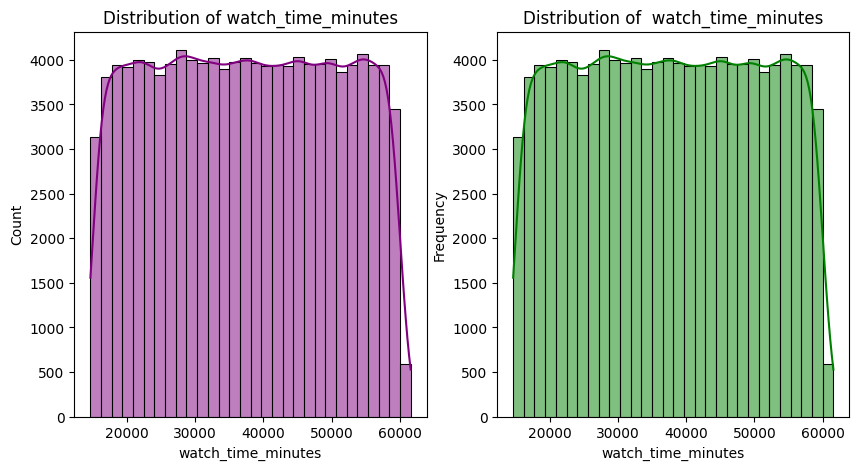



 * watch_time_minutes is symmetric or zero skew (perfectly symmetrical)
 * watch_time_minutes distribution is platykurtic (flatter)

--- video_length_minutes ---
count    120000.000000
mean         16.017910
std           8.084928
min           2.000142
25%           9.005928
50%          16.009269
75%          23.026064
max          29.999799
Name: video_length_minutes, dtype: float64




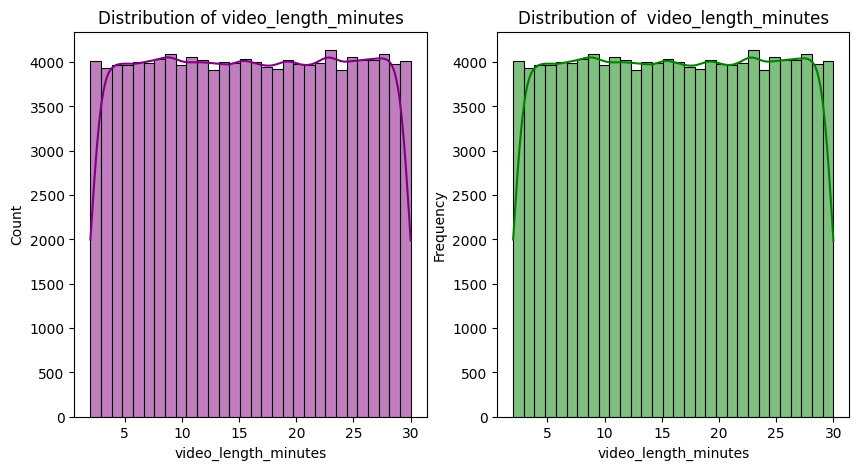



 * video_length_minutes is symmetric or zero skew (perfectly symmetrical)
 * video_length_minutes distribution is platykurtic (flatter)

--- subscribers ---
count    120000.000000
mean     502291.970050
std      288364.967705
min        1005.000000
25%      252641.500000
50%      503633.500000
75%      752386.250000
max      999997.000000
Name: subscribers, dtype: float64




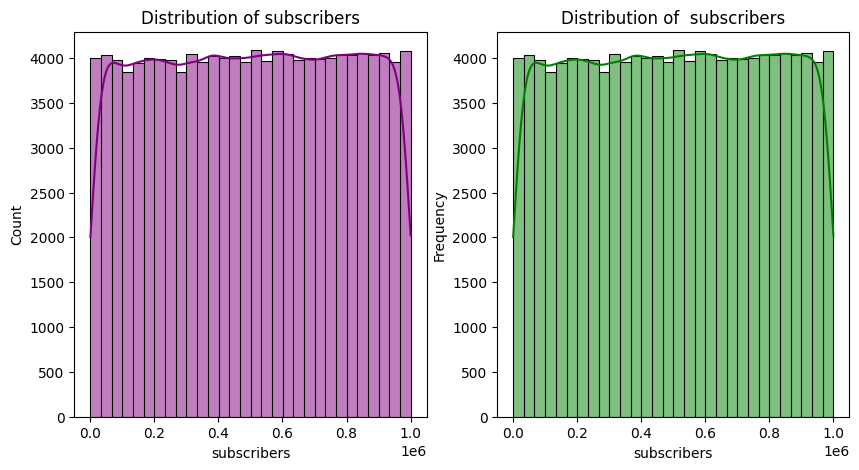



 * subscribers is symmetric or zero skew (perfectly symmetrical)
 * subscribers distribution is platykurtic (flatter)

--- ad_revenue_usd ---
count    120000.000000
mean        252.711361
std          61.954125
min         126.590603
25%         199.892158
50%         252.678607
75%         305.613497
max         382.768254
Name: ad_revenue_usd, dtype: float64




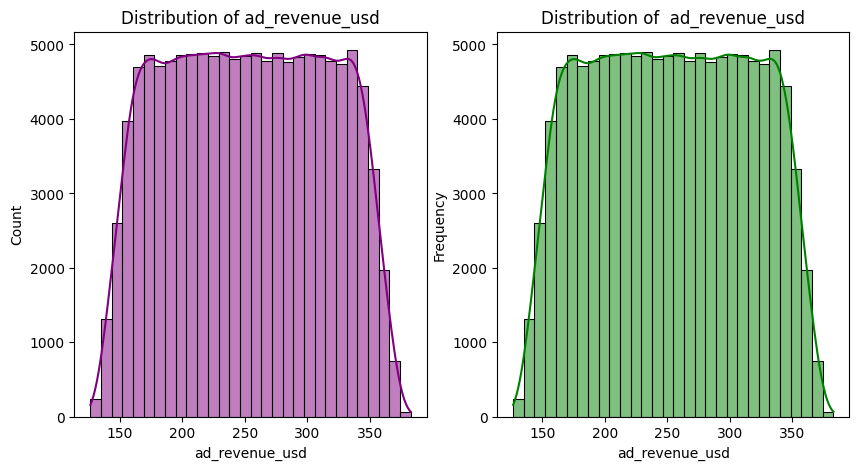



 * ad_revenue_usd is symmetric or zero skew (perfectly symmetrical)
 * ad_revenue_usd distribution is platykurtic (flatter)


In [21]:

# Define numeric columns
Numerical_col=youtube_data.select_dtypes(include=['int64','float64']).columns


# -------------------
# 1.Numeric variables
# -------------------

for col in Numerical_col:
    print(f"\n--- {col} ---")
    print(youtube_data[col].describe())  # summary statistics

    print(f"\n")
    plt.figure(figsize=(10,5))          #width and height = 10, 5

    # Histogram + KDE

    #divides the figure into a grid of subplots:
    #1 row, 2 columns → two plots side by side   &
    #1 → this is the first plot in the grid


    plt.subplot(1,2,1)

    #kde=True → overlays a Kernel Density Estimate line on top of the histogram.
    #Shows the smoothed probability distribution.

    sns.histplot(youtube_data[col], kde=True, bins=30, color="purple")

    plt.title(f'Distribution of {col}')

  # with frequency
    plt.subplot(1,2,2)
    sns.histplot(youtube_data[col], kde=True, bins=30, color="green")

    plt.title(f'Distribution of  {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    print(f"\n")  #for spacing

    # Insights
    col_desc = youtube_data[col].describe()
    skewness = youtube_data[col].skew()
    kurtosis = youtube_data[col].kurt()

    #check skewness

    if skewness > 1:
      print(f" * {col} is positive skew (right-skewed)")
    elif skewness < -1:
      print(f" * {col} is negative skew (left-skewed)")
    else:
      print(f" * {col} is symmetric or zero skew (perfectly symmetrical)")

    #check kurtosis

    if kurtosis < 3 :
      print(f" * {col} distribution is platykurtic (flatter)")
    elif kurtosis > 3:
      print(f" * {col} distribution is leptokurtic (peaked)")
    else:
      print(f" * {col} distribution is mesokurtic (normal-like)")










--- video_id ---


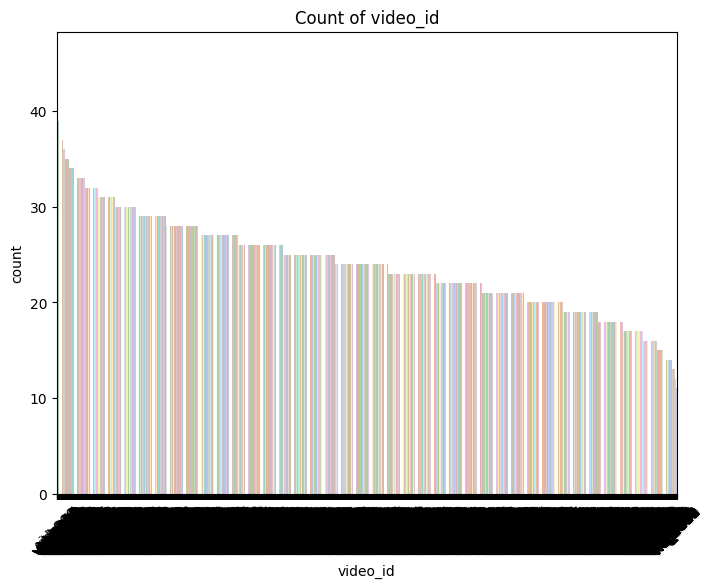


--- date ---


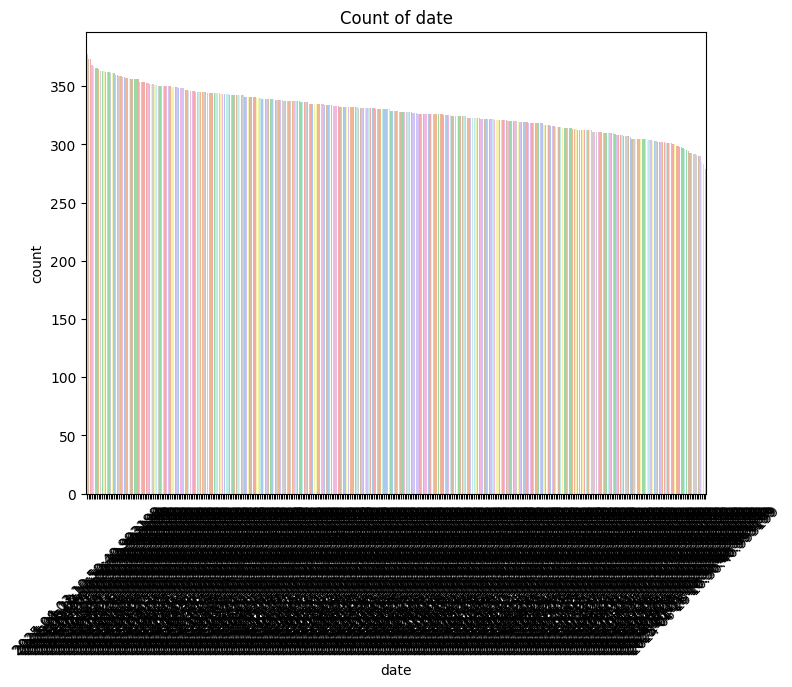


--- category ---


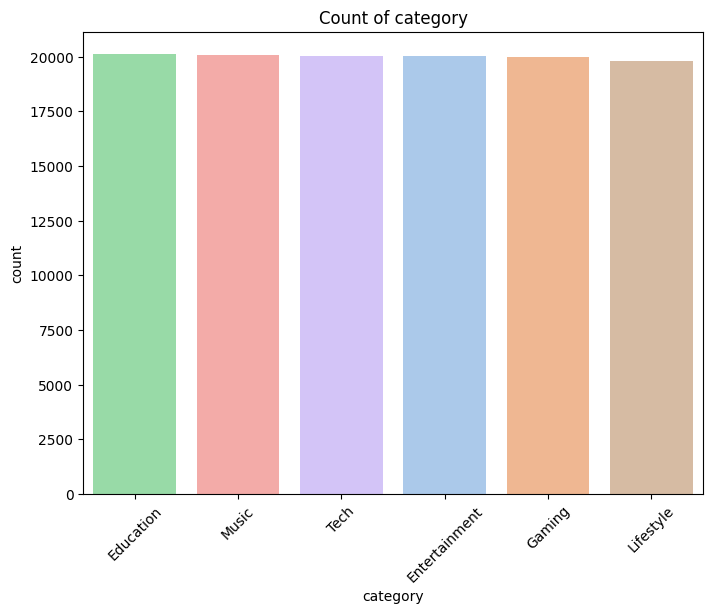


--- device ---


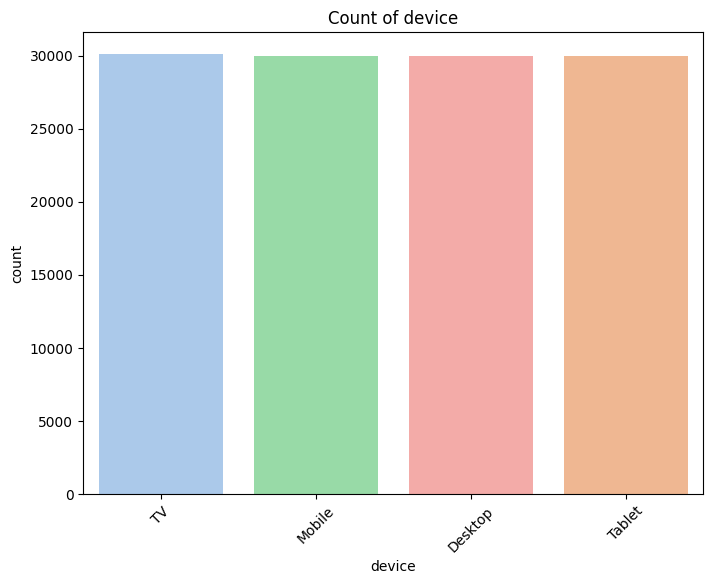


--- country ---


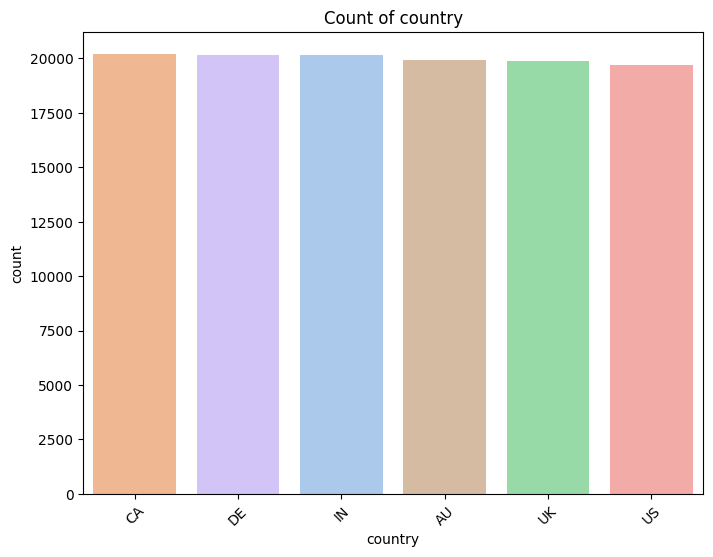

In [22]:

# -------------------
# 2.Categorical variables
# -------------------
Categorical_col=youtube_data.select_dtypes(include='object').columns
Categorical_col

for col in Categorical_col:
    print(f"\n--- {col} ---")
    plt.figure(figsize=(8,6))  #height and width
    sns.countplot(
        data=youtube_data,
        x=col,
        palette='pastel',
        order=youtube_data[col].value_counts().index,
        hue=col,
        dodge=False,
        legend=False,
        )

  # Rotate the x-axis labels by 45 degrees
    plt.xticks(rotation=45)
    #title
    plt.title(f"Count of {col}")
    plt.show()

Bivariate Analysis - Correlation, Scatterplots, Boxplots with Insights

  
    Perform bivariate analysis with insights:
    - Correlation heatmap for numeric variables
    - Scatterplots for numeric features vs. target
    - Boxplots for categorical features vs. target
  

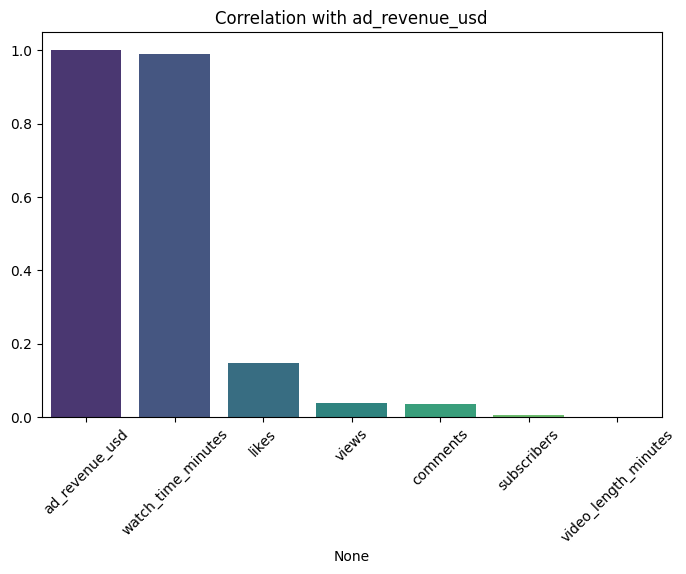

In [23]:
    # -----------------------
    # 1. Correlation with Target
    # -----------------------

target_col = 'ad_revenue_usd'  # keep it as string, not Series

corr = youtube_data.corr(numeric_only=True)[target_col].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=corr.index,
    y=corr.values,
    hue=corr.index,         # same as x, just for coloring
    palette="viridis",
    legend=False
)
plt.xticks(rotation=45)
plt.title(f"Correlation with {target_col}")
plt.show()





--- views ---


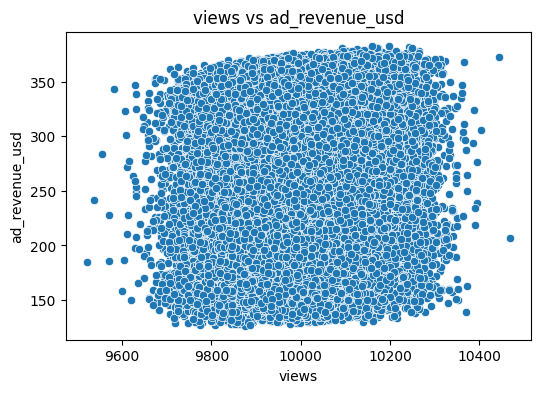



 * views has little to no clear linear relationship with ad_revenue_usd (corr=0.04)

--- likes ---


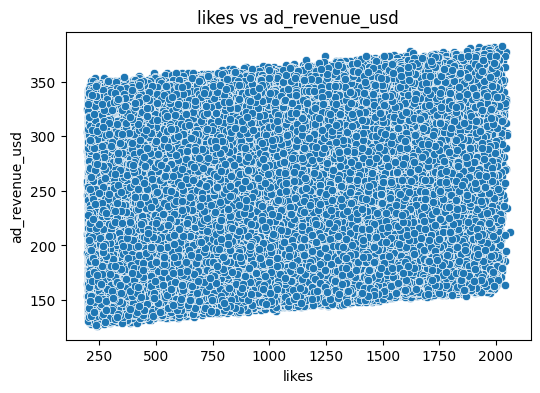



 * likes has little to no clear linear relationship with ad_revenue_usd (corr=0.15)

--- comments ---


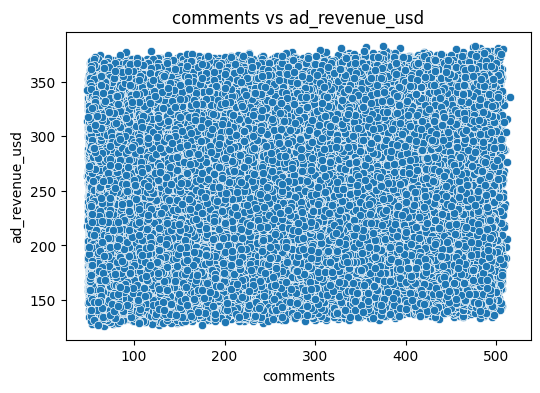



 * comments has little to no clear linear relationship with ad_revenue_usd (corr=0.03)

--- watch_time_minutes ---


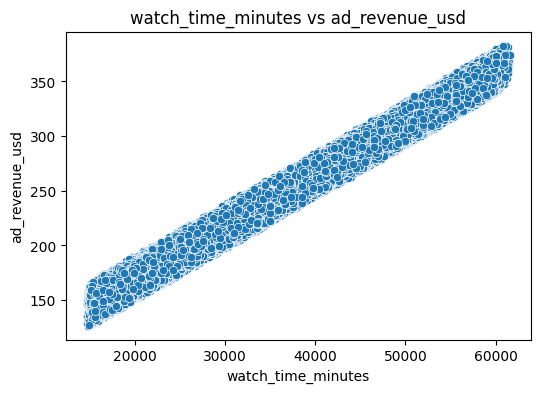



 * watch_time_minutes shows a positive relationship with ad_revenue_usd (corr=0.99)

--- video_length_minutes ---


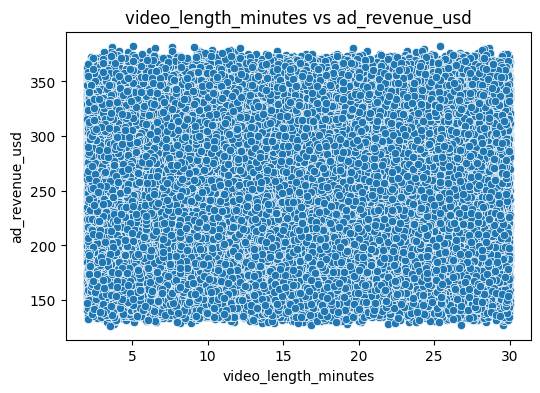



 * video_length_minutes has little to no clear linear relationship with ad_revenue_usd (corr=0.00)

--- subscribers ---


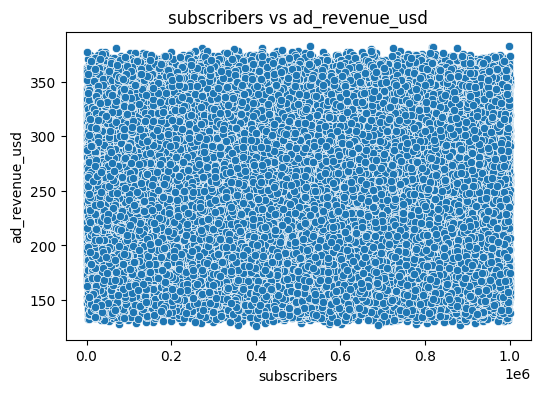



 * subscribers has little to no clear linear relationship with ad_revenue_usd (corr=0.01)


In [24]:
# -----------------------
# 2. Numeric Features vs Target (Scatterplots)
# -----------------------
num_features = youtube_data.select_dtypes(include=['int64','float64']).columns.drop(target_col)
for col in num_features:

  print(f"\n--- {col} ---")

  plt.figure(figsize=(6,4))
  sns.scatterplot(x=youtube_data[col], y=youtube_data[target_col])
  plt.title(f"{col} vs {target_col}")
  plt.show()


  print(f"\n")

# Scatterplot insights. since it is contin add the if statement inside for loop
  corr_value = youtube_data[col].corr(youtube_data[target_col])
  if corr_value > 0.3:
        print(f" * {col} shows a positive relationship with {target_col} (corr={corr_value:.2f})")
  elif corr_value < -0.3:
        print(f" * {col} shows a negative relationship with {target_col} (corr={corr_value:.2f})")
  else:
        print(f" * {col} has little to no clear linear relationship with {target_col} (corr={corr_value:.2f})")


--- category ---


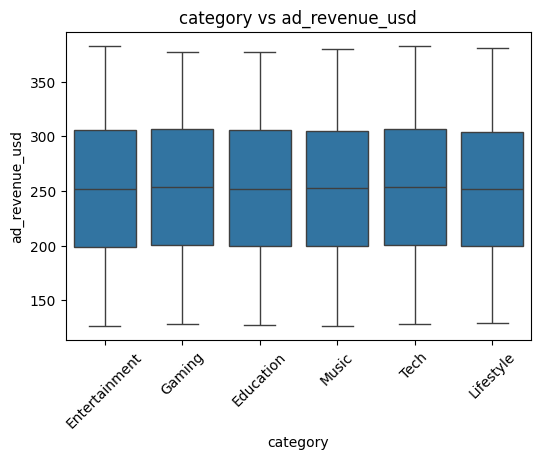



🔹 In category, 'Tech' category has the highest average ad_revenue_usd (253.46), with max correlation 0.01 with ad_revenue_usd.

--- device ---


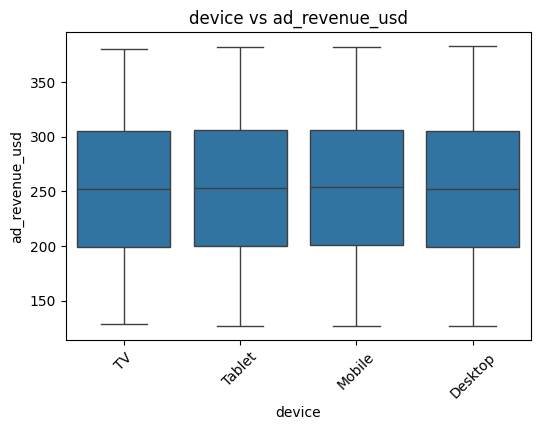



🔹 In device, 'Mobile' category has the highest average ad_revenue_usd (253.24), with max correlation 0.00 with ad_revenue_usd.

--- country ---


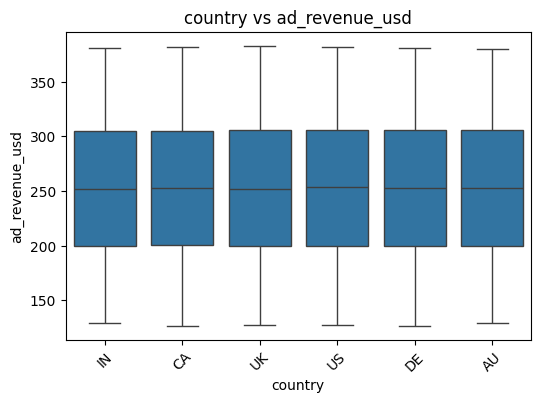



🔹 In country, 'US' category has the highest average ad_revenue_usd (253.18), with max correlation 0.00 with ad_revenue_usd.


In [25]:
# -----------------------
# 3. Categorical Features vs Target (Boxplots)
# -----------------------

#Notes:
#video_id is just an identifier → not useful for boxplots.
#date should usually be converted into month, year, weekday, etc. before analysis.



# Get categorical features (excluding video_id and date)
cat_features = youtube_data.select_dtypes(include=['object', 'category']).columns
cat_features = [col for col in cat_features if col not in ['video_id', 'date']]

# Loop through categorical features
for col in cat_features:
  print(f"\n--- {col} ---")
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=youtube_data[col], y=youtube_data[target_col])
  plt.xticks(rotation=45)
  plt.title(f"{col} vs {target_col}")
  plt.show()

  print(f"\n")

  # Boxplot insights
  group_0 = youtube_data.groupby(col)[target_col].mean().sort_values(ascending=False)
  top_cat = group_0.index[0]

  # Correlation using one-hot encoding
  dummies = pd.get_dummies(youtube_data[col], drop_first=True)
  corr_with_target = dummies.corrwith(youtube_data[target_col]).max()
  print(f"🔹 In {col}, '{top_cat}' category has the highest average {target_col} ({group_0.iloc[0]:.2f}), "
          f"with max correlation {corr_with_target:.2f} with {target_col}.")

Multivariate Analysis


    Perform multivariate analysis with insights:
    - Pairplot of numeric features with target
    - Grouped barplots for categorical vs categorical vs target
    - Correlation Heatmap

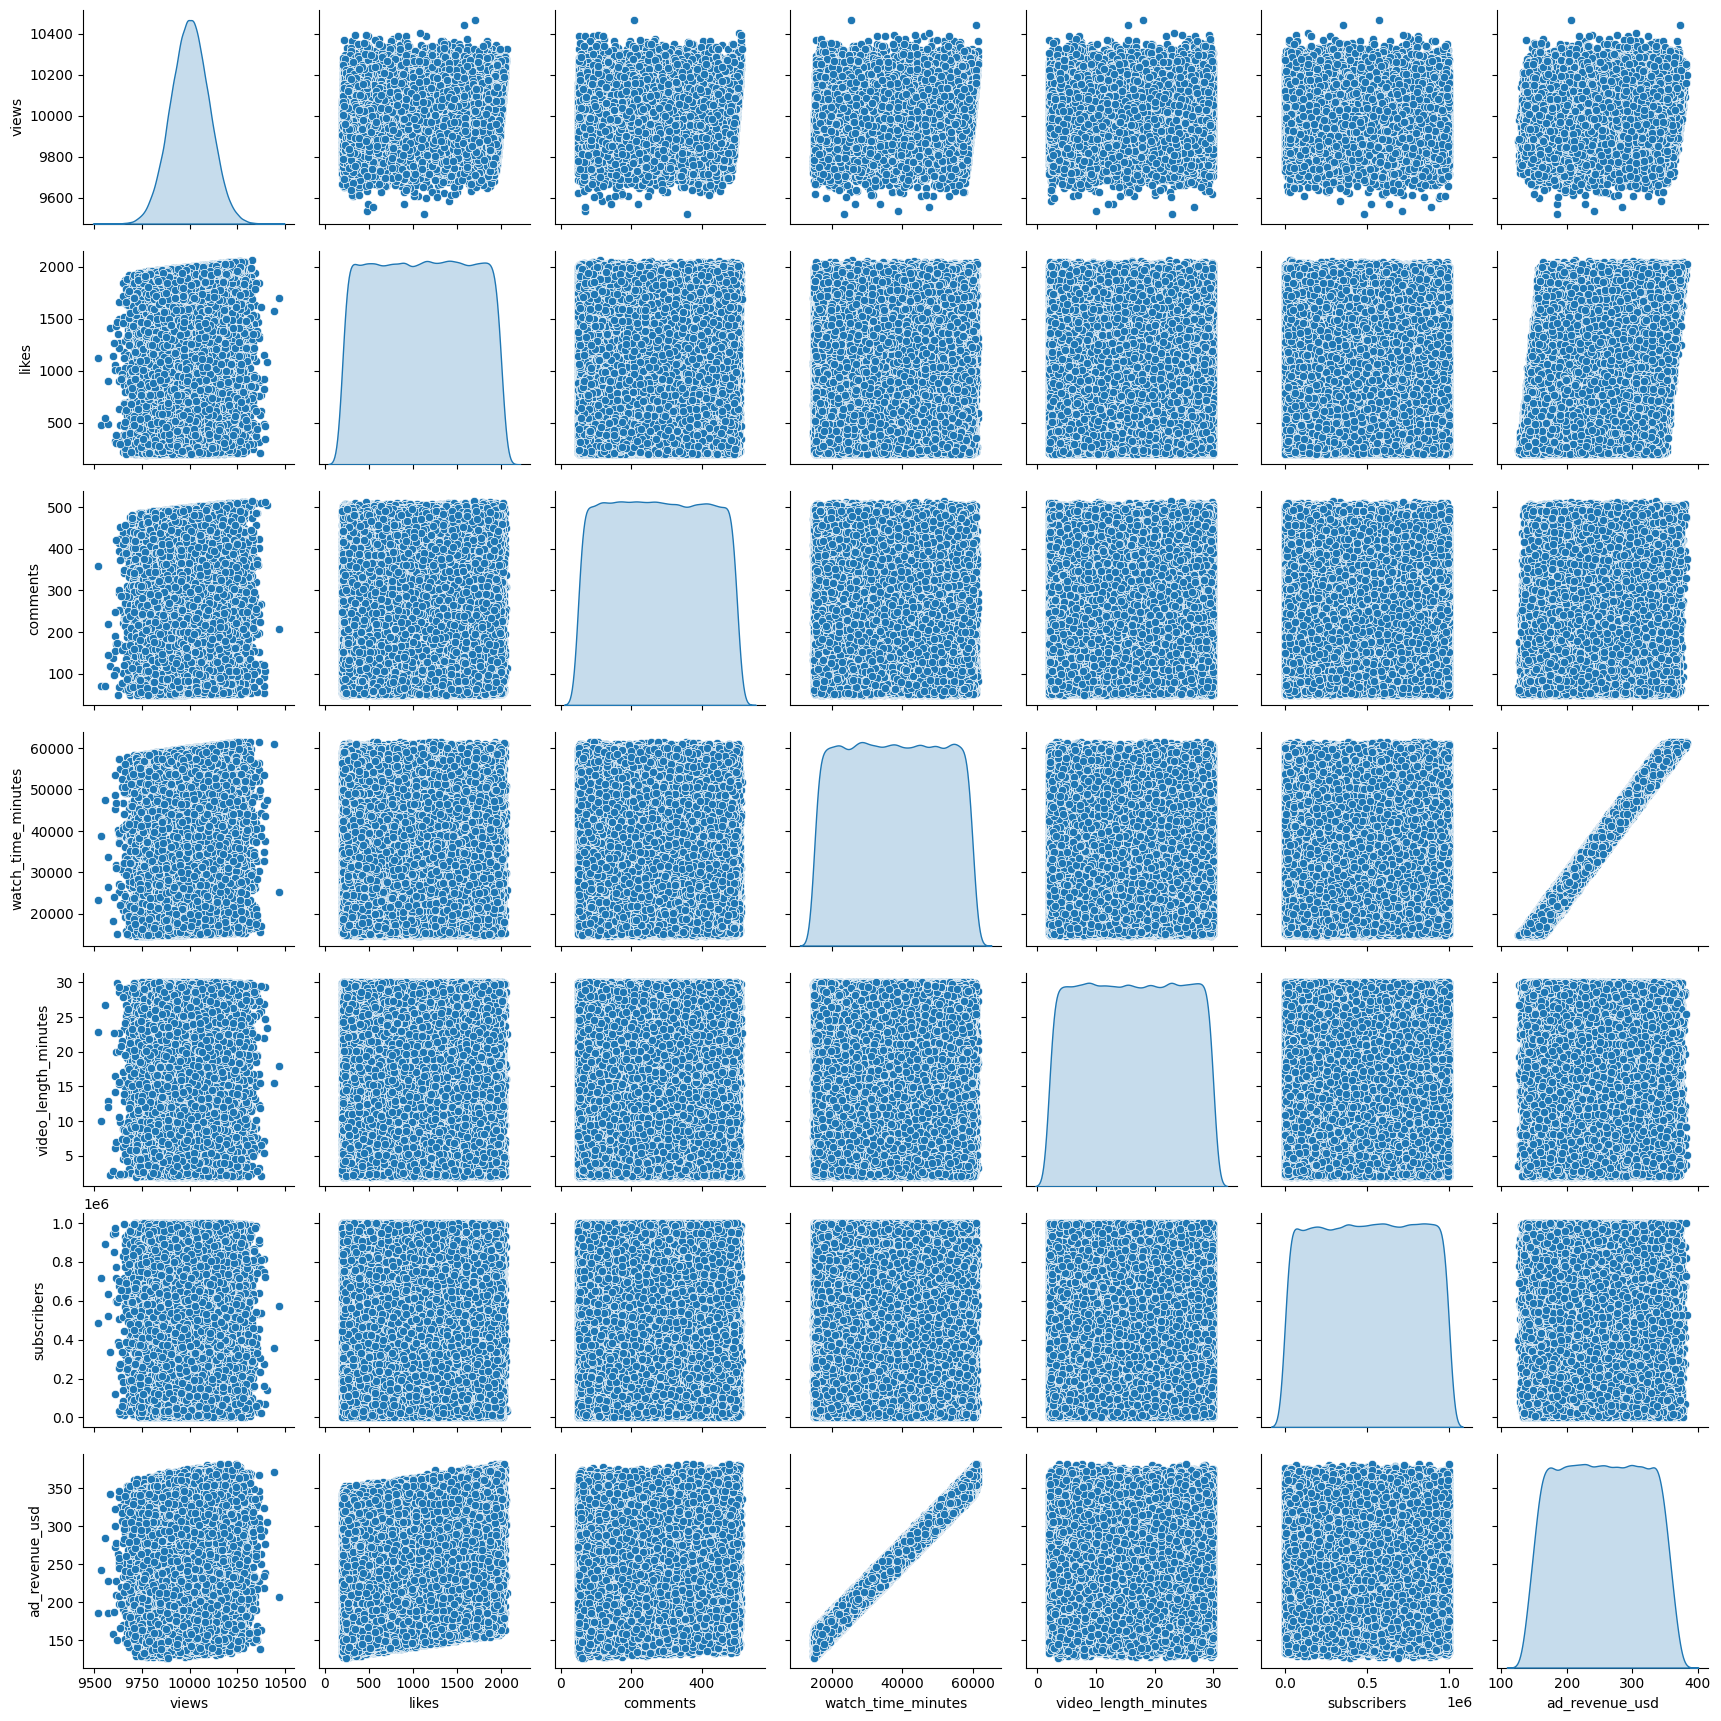

In [26]:
# -------------------------
# 1. Pairplot for Numerics
# -------------------------

# Select only numeric columns
numeric_dataset = youtube_data.select_dtypes(include=['int64', 'float64'])

# Pairplot
sns.pairplot(numeric_dataset,diag_kind="kde",height=2.5)
plt.show()



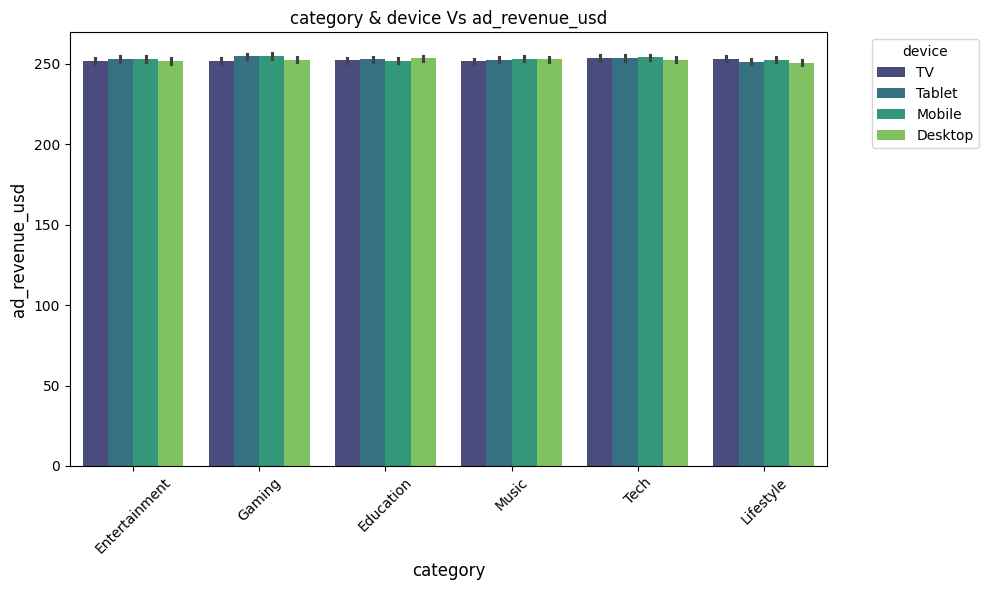

In [27]:
# -------------------------
# 2. Grouped barplots
# -------------------------

Category = "category"
Device = "device"
target_var = "ad_revenue_usd"


plt.figure(figsize=(10,6))
sns.barplot(
    data=youtube_data,
    x=Category,
    y=target_var,
    hue=Device,
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title(f"{Category} & {Device} Vs {target_var}")
plt.xlabel(Category, fontsize=12)
plt.ylabel(target_var, fontsize=12)
plt.legend(title=Device, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


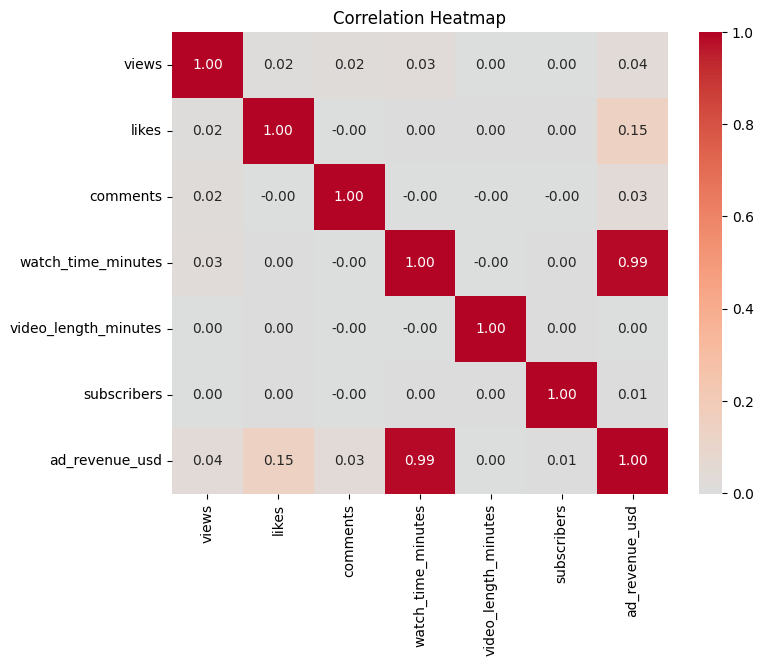

Feature Correlation Insights:
🔹 Features most correlated with ad_revenue_usd:
  - watch_time_minutes: 0.989
  - likes: 0.146
  - views: 0.038
  - comments: 0.034
  - subscribers: 0.005
  - video_length_minutes: 0.000

⚠️ Potential multicollinearity detected between:
   - ad_revenue_usd & watch_time_minutes: 0.989


In [28]:
# -------------------------
# 3.Correlation Heatmap
# -------------------------


numer_features = youtube_data.select_dtypes(include=['number'])  # auto-picks int & float
if numer_features.shape[1] > 2:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numer_features.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

def correlation_insights(youtube_data, target_col="ad_revenue_usd", threshold=0.8):
    corr = youtube_data.corr(numeric_only=True)
    target_corr = corr[target_col].drop(target_col).sort_values(ascending=False)

    print("Feature Correlation Insights:")
    print(f"🔹 Features most correlated with {target_col}:")
    for f, c in target_corr.items():
        print(f"  - {f}: {c:.3f}")

    # Detect multicollinearity
    high_corr = (corr.abs() > threshold) & (corr.abs() < 1)
    pairs = [
        (i, j, corr.loc[i, j])
        for i in corr.columns for j in corr.columns
        if high_corr.loc[i, j] and i < j
    ]

    if pairs:
        print("\n⚠️ Potential multicollinearity detected between:")
        for i, j, val in pairs:
            print(f"   - {i} & {j}: {val:.3f}")
    else:
        print("\n✅ No significant multicollinearity detected")

# Run on your dataset
correlation_insights(youtube_data, "ad_revenue_usd")


## Data cleaning and preprocessing

In [29]:
print(f"Dataset shape before cleaning {youtube_data.shape}")
print()
print(f"Missing values before cleaning:\n{youtube_data.isnull().sum()}")
print()
print(f"Duplicates before cleaning: {youtube_data.duplicated().sum()}")
print()
print(f"Data types before cleaning:\n{youtube_data.dtypes}")
print()
print(f"Statistical summary before cleaning:\n{youtube_data.describe(include='all')}")
print()
print(f"Unique values per column before cleaning:\n{youtube_data.nunique()}")
print()
print(f"First 5 rows before cleaning:\n{youtube_data.head()}")

Dataset shape before cleaning (120000, 12)

Missing values before cleaning:
video_id                   0
date                       0
views                      0
likes                   6000
comments                6000
watch_time_minutes      6000
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

Duplicates before cleaning: 0

Data types before cleaning:
video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

Statistical summary before cleaning:
        video_id                        date          views        

In [30]:
youtube_data.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')

In [31]:

#Handle missing values using strategy (fill / drop).
# Example: fill numerical with median, categorical with mode
for col in youtube_data.columns:
    if youtube_data[col].dtype in ['int64', 'float64']:
        youtube_data[col] = youtube_data[col].fillna(youtube_data[col].median())
    else:
        youtube_data[col] = youtube_data[col].fillna(youtube_data[col].mode()[0])


●	Feature Engineering

In [32]:

youtube_data['date'] = pd.to_datetime(youtube_data['date'], errors="coerce")
# Extract components
youtube_data["year"] = youtube_data['date'].dt.year
youtube_data["month"] = youtube_data['date'].dt.month
youtube_data["day"] = youtube_data['date'].dt.day
youtube_data["weekday"] = youtube_data['date'].dt.weekday

# Lifecycle feature
youtube_data["days_since_upload"] = (youtube_data['date'] - youtube_data['date'].min()).dt.days
youtube_data.drop(columns=['date'], inplace=True)

youtube_data.head()


video_id  views   likes  comments  watch_time_minutes  \
0  vid_3092   9936  1221.0     320.0        26497.214184   
1  vid_3459  10017   642.0     346.0        15209.747445   
2  vid_4784  10097  1979.0     187.0        57332.658498   
3  vid_4078  10034  1191.0     242.0        31334.517771   
4  vid_3522   9889  1858.0     477.0        15665.666434   

   video_length_minutes  subscribers       category  device country  \
0              2.862137       228086  Entertainment      TV      IN   
1             23.738069       736015         Gaming  Tablet      CA   
2             26.200634       240534      Education      TV      CA   
3             11.770340       434482  Entertainment  Mobile      UK   
4              6.635854        42030      Education  Mobile      CA   

   ad_revenue_usd  year  month  day  weekday  days_since_upload  
0      203.178237  2024      9   24        1                107  
1      140.880508  2024      9   22        6                105  
2      360.134008  2024     11   21        3                165  
3      224.638261  2025      1   28        1                233  
4      165.514388  2025      4   28        0                323

In [33]:
# Watch completion ratio
youtube_data['watch_completion'] = youtube_data['watch_time_minutes'] / (youtube_data['video_length_minutes'] + 1e-6)
# watch time_per_view
youtube_data['watch_time_per_view'] = youtube_data['watch_time_minutes'] / (youtube_data['views'] + 1e-6)
# engagement_rate
youtube_data['engagement_rate'] = ((youtube_data['likes'] + youtube_data['comments']) / youtube_data['views']) * 100

#subscriber_ratio
youtube_data['subscriber_ratio'] = youtube_data['subscribers'] / youtube_data['views']

In [34]:
youtube_data.head()

video_id  views   likes  comments  watch_time_minutes  \
0  vid_3092   9936  1221.0     320.0        26497.214184   
1  vid_3459  10017   642.0     346.0        15209.747445   
2  vid_4784  10097  1979.0     187.0        57332.658498   
3  vid_4078  10034  1191.0     242.0        31334.517771   
4  vid_3522   9889  1858.0     477.0        15665.666434   

   video_length_minutes  subscribers       category  device country  \
0              2.862137       228086  Entertainment      TV      IN   
1             23.738069       736015         Gaming  Tablet      CA   
2             26.200634       240534      Education      TV      CA   
3             11.770340       434482  Entertainment  Mobile      UK   
4              6.635854        42030      Education  Mobile      CA   

   ad_revenue_usd  year  month  day  weekday  days_since_upload  \
0      203.178237  2024      9   24        1                107   
1      140.880508  2024      9   22        6                105   
2      360.134008  2024     11   21        3                165   
3      224.638261  2025      1   28        1                233   
4      165.514388  2025      4   28        0                323   

   watch_completion  watch_time_per_view  engagement_rate  subscriber_ratio  
0       9257.840783             2.666789        15.509259         22.955515  
1        640.732280             1.518393         9.863233         73.476590  
2       2188.216407             5.678187        21.451916         23.822323  
3       2662.158861             3.122834        14.281443         43.300977  
4       2360.760860             1.584151        23.612094          4.250177

In [35]:
print(f"Feature engineering done successfully.")

Feature engineering done successfully.


In [36]:
#check the missing values

print(f"New shape: {youtube_data.shape}")
print()
print(f"Missing values after cleaning:\n{youtube_data.isnull().sum()}")
print()
print(f"Duplicates after cleaning: {youtube_data.duplicated().sum()}")
print()
print(f"Data types after cleaning:\n{youtube_data.dtypes}")
print()
print(f"column values after data cleaning:\n {youtube_data.columns}")
print()
print(f"Statistical summary after cleaning:\n{youtube_data.describe(include='all')}")
print()
print(f"Unique values per column after cleaning:\n{youtube_data.nunique()}")
print()
print(f"First 5 rows after cleaning:\n{youtube_data.head()}")

New shape: (120000, 20)

Missing values after cleaning:
video_id                0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
year                    0
month                   0
day                     0
weekday                 0
days_since_upload       0
watch_completion        0
watch_time_per_view     0
engagement_rate         0
subscriber_ratio        0
dtype: int64

Duplicates after cleaning: 0

Data types after cleaning:
video_id                 object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
y

## Encoding & Scaling

In [37]:
# # One-Hot Encoding categorical columns

encoder =pd.get_dummies(youtube_data, columns=['category', 'device', 'country'], drop_first=True)
print("\nAfter One-Hot Encoding:")
print(encoder.head())


After One-Hot Encoding:
   video_id  views   likes  comments  watch_time_minutes  \
0  vid_3092   9936  1221.0     320.0        26497.214184   
1  vid_3459  10017   642.0     346.0        15209.747445   
2  vid_4784  10097  1979.0     187.0        57332.658498   
3  vid_4078  10034  1191.0     242.0        31334.517771   
4  vid_3522   9889  1858.0     477.0        15665.666434   

   video_length_minutes  subscribers  ad_revenue_usd  year  month  ...  \
0              2.862137       228086      203.178237  2024      9  ...   
1             23.738069       736015      140.880508  2024      9  ...   
2             26.200634       240534      360.134008  2024     11  ...   
3             11.770340       434482      224.638261  2025      1  ...   
4              6.635854        42030      165.514388  2025      4  ...   

   category_Music  category_Tech  device_Mobile  device_TV  device_Tablet  \
0           False          False          False       True          False   
1           Fal

●	Model Building

In [38]:
X = encoder.drop(columns = ['ad_revenue_usd', 'video_id']) #['video_id']) Unique value.
y = encoder['ad_revenue_usd']

In [39]:
target_col = y = youtube_data['ad_revenue_usd']
print ('target=', target_col )

target= 0         203.178237
1         140.880508
2         360.134008
3         224.638261
4         165.514388
             ...    
122395    280.986396
122396    354.612981
122397    203.643106
122398    351.525811
122399    253.842824
Name: ad_revenue_usd, Length: 120000, dtype: float64


In [40]:
print(f"x shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"x columns: {X.columns}")

x shape: (120000, 28)
y shape: (120000,)
x columns: Index(['views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'year', 'month', 'day',
       'weekday', 'days_since_upload', 'watch_completion',
       'watch_time_per_view', 'engagement_rate', 'subscriber_ratio',
       'category_Entertainment', 'category_Gaming', 'category_Lifestyle',
       'category_Music', 'category_Tech', 'device_Mobile', 'device_TV',
       'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 'country_UK',
       'country_US'],
      dtype='object')


In [41]:
feature_names=['views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'year', 'month', 'day',
       'weekday', 'days_since_upload', 'watch_completion',
       'watch_time_per_view', 'engagement_rate', 'subscriber_ratio',
       'category_Entertainment', 'category_Gaming', 'category_Lifestyle',
       'category_Music', 'category_Tech', 'device_Mobile', 'device_TV',
       'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 'country_UK',
       'country_US']

In [42]:
y

0         203.178237
1         140.880508
2         360.134008
3         224.638261
4         165.514388
             ...    
122395    280.986396
122396    354.612981
122397    203.643106
122398    351.525811
122399    253.842824
Name: ad_revenue_usd, Length: 120000, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((96000, 28), (24000, 28), (96000,), (24000,))

In [45]:
# Scaling of the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

●	Model training & Evaluation

Random Forest Results:
R² Score : 0.9519
RMSE     : 13.5801


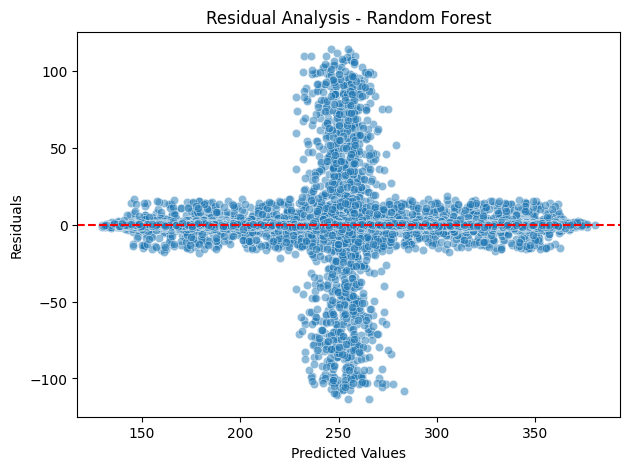

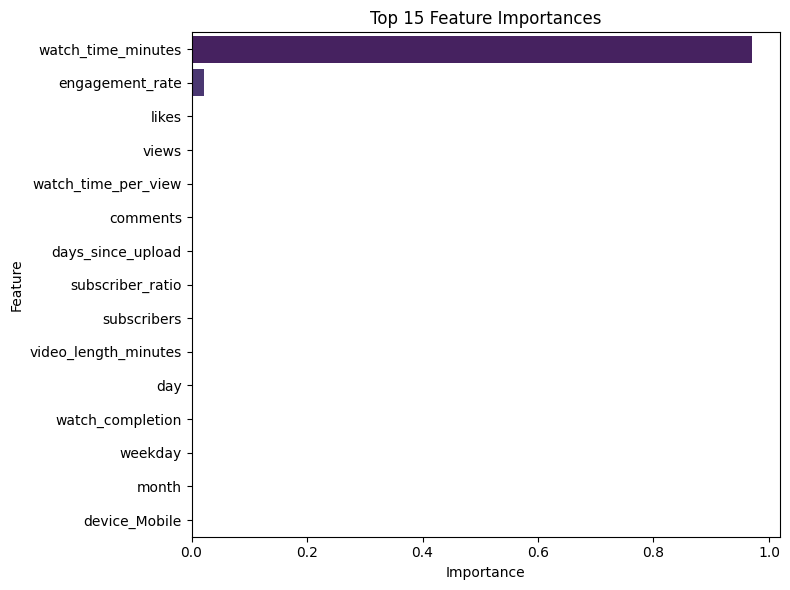

In [46]:


def run_random_forest(X, y, test_size=0.2, random_state=42, n_estimators=200, max_depth=None):

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Model
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

    # Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("Random Forest Results:")
    print(f"R² Score : {r2:.4f}")
    print(f"RMSE     : {rmse:.4f}")

    # Residual analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Analysis - Random Forest")
    plt.show()

    # Feature importance
    feature_importance = pd.DataFrame({
        "Feature": X.columns,
        "Importance": rf.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    print()
    plt.figure(figsize=(8,6))
    sns.barplot(x="Importance",
                y="Feature",
                hue="Feature",
                dodge=False,
                legend=False,
                data=feature_importance.head(15),
                palette="viridis")
    plt.title("Top 15 Feature Importances")
    plt.tight_layout()
    plt.show()

    return rf, feature_importance

# Run Random Forest
rf_model, feature_importance = run_random_forest(X, y, n_estimators=300, max_depth=12)





In [47]:

# Save the trained Random Forest model as a pickle file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Random Forest model saved successfully as 'random_forest_model.pkl'")


Random Forest model saved successfully as 'random_forest_model.pkl'


In [48]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Print results
    print(f"{name} Performance:")
    print(f"R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    print("-" * 50)




Linear Regression Performance:
R2: 0.9526, MAE: 3.1236, MSE: 181.7315, RMSE: 13.4808
--------------------------------------------------
Ridge Regression Performance:
R2: 0.9526, MAE: 3.1234, MSE: 181.7267, RMSE: 13.4806
--------------------------------------------------
Lasso Regression Performance:
R2: 0.9526, MAE: 3.1224, MSE: 181.6677, RMSE: 13.4784
--------------------------------------------------
Decision Tree Performance:
R2: 0.9029, MAE: 5.3261, MSE: 372.0952, RMSE: 19.2898
--------------------------------------------------
Gradient Boosting Performance:
R2: 0.9523, MAE: 3.6149, MSE: 182.7964, RMSE: 13.5202
--------------------------------------------------


## Saving Files

In [49]:
#pickling

for name, model in models.items():
    filename = f"{name.replace(' ', '_').lower()}.pkl"

    with open(filename, "wb") as file:
        pickle.dump(model, file)

    print(f"{name} model saved successfully as '{filename}'")


Linear Regression model saved successfully as 'linear_regression.pkl'
Ridge Regression model saved successfully as 'ridge_regression.pkl'
Lasso Regression model saved successfully as 'lasso_regression.pkl'
Decision Tree model saved successfully as 'decision_tree.pkl'
Gradient Boosting model saved successfully as 'gradient_boosting.pkl'
